# Exploratory Data Analysis (EDA)

## 📈 Rating Trends and Correlation Analysis

### Dataset Configuration
- **Source**: Unified dataset containing joined Amazon reviews and product metadata  
- **Time Range**: 1995–2025
---

### Rating vs Time Trend  
**Observed Pattern**:  
1995–2000: Rapid Decline (4.7–4.2)  
2000–2005: Steady decline → 4.2–4.0  
2005–2010: Stabilization  
2010–2020: Gradual increase → 4.1–4.3  
2020–Present: Decline to 4.0

* Early High Ratings (1990s):
    - Novelty of online reviews → Higher tolerance/enthusiasm
    - Early adopters more tech-savvy/optimistic
* 2000s Decline:
    - Mainstream adoption → Diverse user expectations
    - Emergence of critical review culture
* Post-2010 Recovery:
    - Improved Amazon services (Prime, returns)
    - Algorithmic curation of products
* COVID-19 Impact (2020):
    - Supply chain disruptions → Negative experiences

### Review Length vs Rating Correlation
**Findidngs:**
* The pearson correlation was found to be -0.0672

**Interpretation:**
* weak negative linear realtionship between the length of a review (ie longer reviews may be slightly indicative of longer reviews).
* This small correlation coefficient is only considered significant due to the large smaple size.
* Non-linera relationships should be considered

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

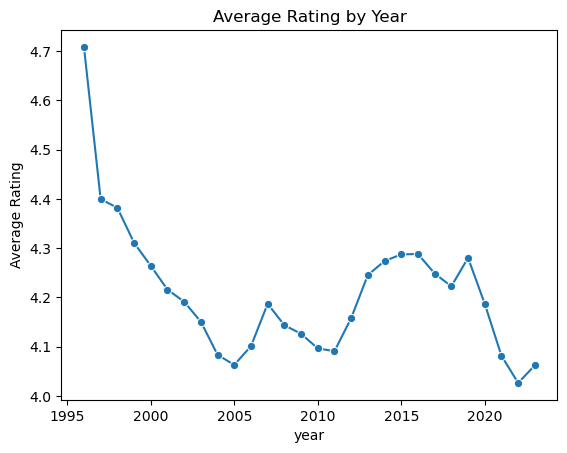

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

 Pearson correlation (review_length vs rating): -0.0672


In [1]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATASET_PATH = "C:/Users/anees/Desktop/datasets/unified_dataset/**/*.parquet"



# Time-Based Rating Trend
yearly_avg = duckdb.query(f"""
    SELECT 
        STRFTIME(TO_TIMESTAMP(CAST(timestamp AS BIGINT) / 1000), '%Y')::INT AS year,
        AVG(rating) AS avg_rating
    FROM read_parquet('{DATASET_PATH}')
    WHERE timestamp IS NOT NULL
    GROUP BY STRFTIME(TO_TIMESTAMP(CAST(timestamp AS BIGINT) / 1000), '%Y')::INT
    ORDER BY year
""").to_df()

sns.lineplot(data=yearly_avg, x="year", y="avg_rating", marker="o").set_title("Average Rating by Year")
plt.ylabel("Average Rating")
plt.show()

# Pearson Correlation
corr = duckdb.query(f"""SELECT corr(review_length, rating) AS pearson_corr FROM read_parquet('{DATASET_PATH}') 
                        WHERE review_length IS NOT NULL AND rating IS NOT NULL""").to_df()
print(f" Pearson correlation (review_length vs rating): {corr['pearson_corr'][0]:.4f}")


## ⭐ Star Rating Distribution Analysis

### Dataset Configuration
- **Source**: Unified dataset containing joined Amazon reviews and metadata  
- **Key Fields Used**:  
  - `rating` (1.0–5.0 star ratings)  
  - Implicit count aggregation

---

### Observations
* J-shaped Distribution
  - Extreme positivity bias (5-star >50% of data)
  - Sharp drop to 4-star
  - 1-star more common than 2-3 stars
* Postential explanation
  - ⭐⭐⭐⭐⭐: "Delighted" customers
  - ⭐: "Outraged" customers
  - ⭐⭐ - ⭐⭐⭐⭐: Ambivalent/moderate experiences
  - Customers are more likely to rate a product if they had an extreme experience (positive or negative) and either very positive excpereinces are more common or some customers with very negative experiences do not wish to spend more time on the product

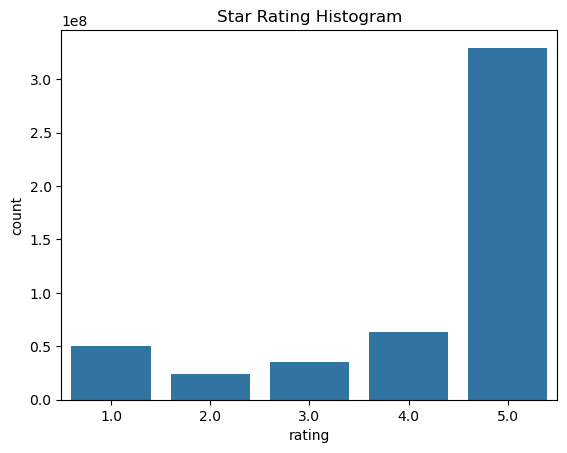

In [2]:
rating_hist = duckdb.query(f"""SELECT rating, COUNT(*) as count FROM read_parquet('{DATASET_PATH}') 
                            GROUP BY rating ORDER BY rating""").to_df()
sns.barplot(data=rating_hist, x="rating", y="count").set_title("Star Rating Histogram")
plt.show()

## 🏆 Top Product Categories Analysis

### Key Observations  
**Ranked Categories**:
1. Amazon Home  
2. Amazon Fashion  
3. Tools & Home Improvement  
4. Buy a Kindle  
5. Books  
6. Cell Phones & Accessories  
7. All Beauty  
8. Health & Personal Care  
9. Automotive  
10. All Electronics

### Distribution Pattern:

* **↘️ Steady Decline:**
    - gradual reduction across ranks 3-10'
    - Steep descent from 2-3

* **Top Heavy Distribution:**
    - Top 2 categories = 15M reviews (47% of top 10 total)
    - Bottom 5 categories = 9.15M reviews (29% of total)
* **Amazon's Product Prioritization**
    - The top 4 categories include:
      Amazon Home
      Amazon Fashion
      Buy a Kindle
    - Amazon likely prioritizes its own brands in search results and recommendations and promotes it with things like prime and amazon basics
* **High-Frequency Goods**
    - The top 10 includes many goods that are purchased frequently such as:
      Health & Personal Care, All Beauty  
      Electronics
      Fashion
    - Daily-use items (e.g., skincare, phone accessories) → repeat buyers.
* **Books and Kindle**
    - Amazon’s origin as a bookstore → entrenched review culture
    - Kindle integration drives digital book reviews

* **Automotive**
    - Niche enthusiast communities (e.g., car parts)
    - High-stakes purchases (e.g., tools, safety gear) → motivated reviewers 

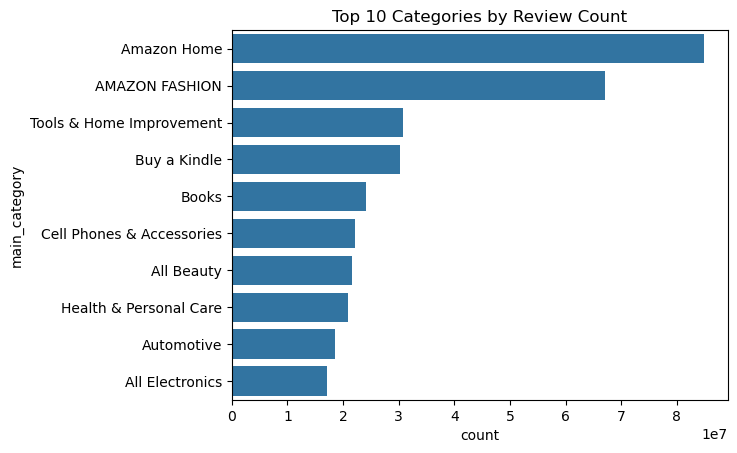

In [3]:
# Top 10 Categories
top_categories = duckdb.query(f"""SELECT main_category, COUNT(*) as count FROM read_parquet('{DATASET_PATH}') 
                            GROUP BY main_category ORDER BY count DESC LIMIT 10""").to_df()
sns.barplot(data=top_categories, x="count", y="main_category").set_title("Top 10 Categories by Review Count")
plt.show()

## 🏭 Top Brand Analysis

### Key Observations  
**Ranked Brands (Review Counts)**:  
1. Amazon           
2. Amazon Basics    
3. Samsung
4. Skechers            
5. Amazon Renewed      
6. Hanes               
7. Sony                
8. Spigen              
9. Anker

### Distribution Pattern:

* **📉 Exponential Decay:**
* **Amazon Ecosystem Dominance:**
    - 🏆 Top 5 Brand Include:
        Parent Company (Amazon)
        Private Label (Basics)
        Renewed Program
    - Algorithmic prioritization in search results
    - Prime membership cross-promotions
* **Samsung/Sony** (established electronics) → Moderate reviews
* **Spigen/Anker** (accessories) → Niche audiences
* **Skechers**  (Mass-market footwear) → High review frequency
* **Hanes** (Basic apparel) → Repeat purchase reviews


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

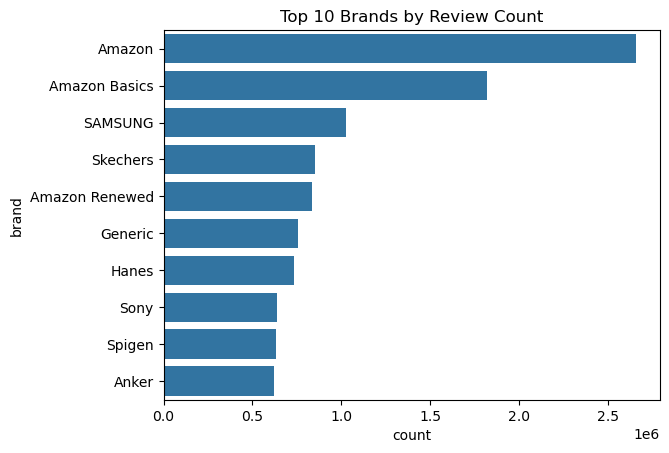

In [4]:
# Top 10 Brands
top_brands = duckdb.query(f"""SELECT brand, COUNT(*) as count FROM read_parquet('{DATASET_PATH}') WHERE brand != 'Unknown' 
                            GROUP BY brand ORDER BY count DESC LIMIT 10""").to_df()
sns.barplot(data=top_brands, x="count", y="brand").set_title("Top 10 Brands by Review Count")
plt.show()